In [ ]:
# !pip install pandas
# !pip install matplotlib

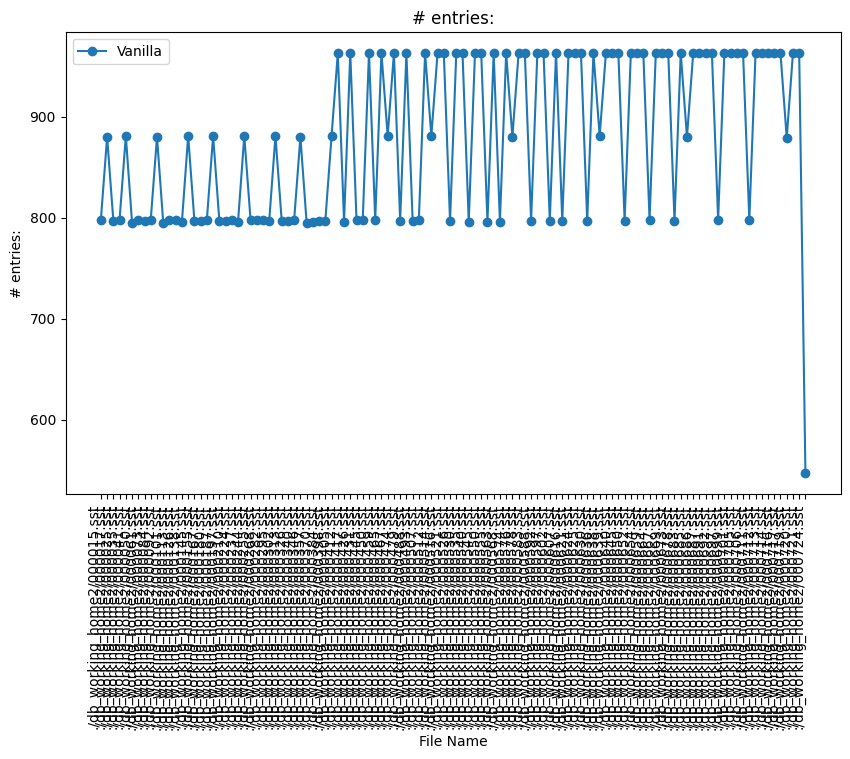

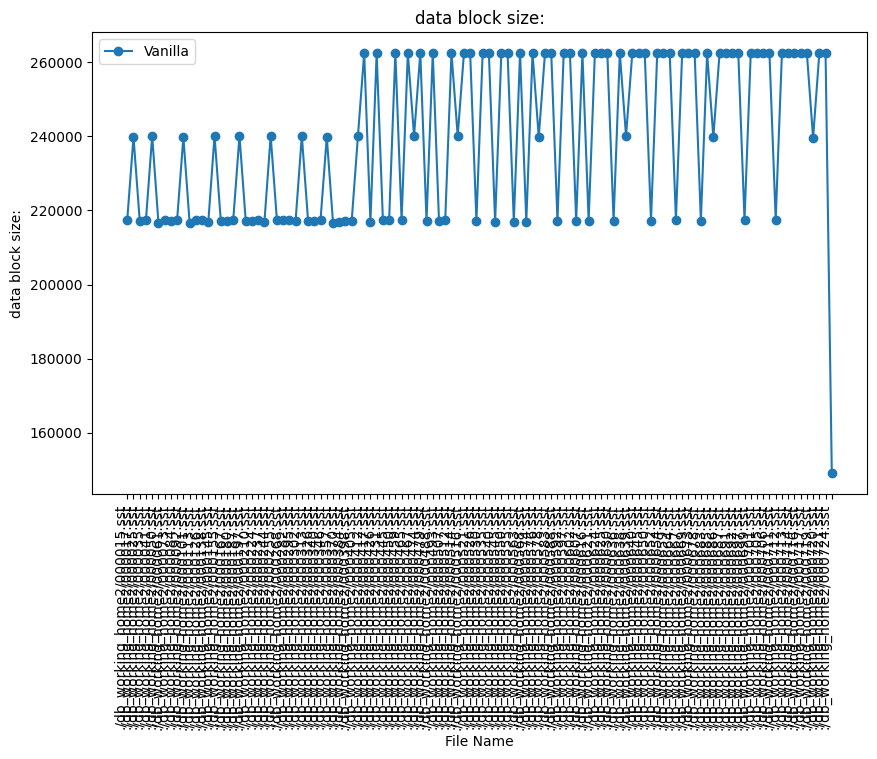

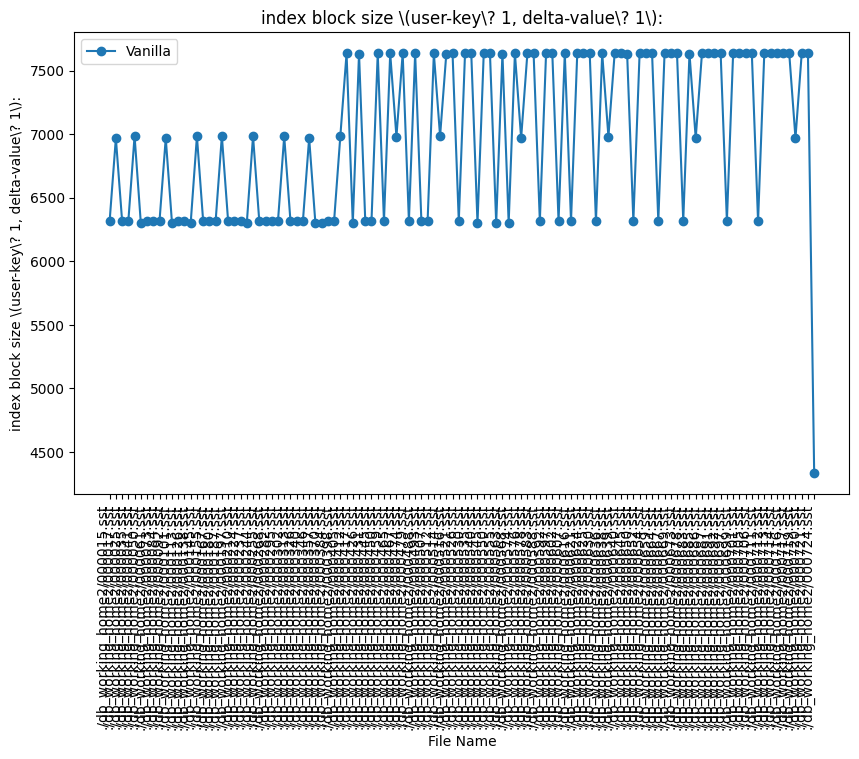

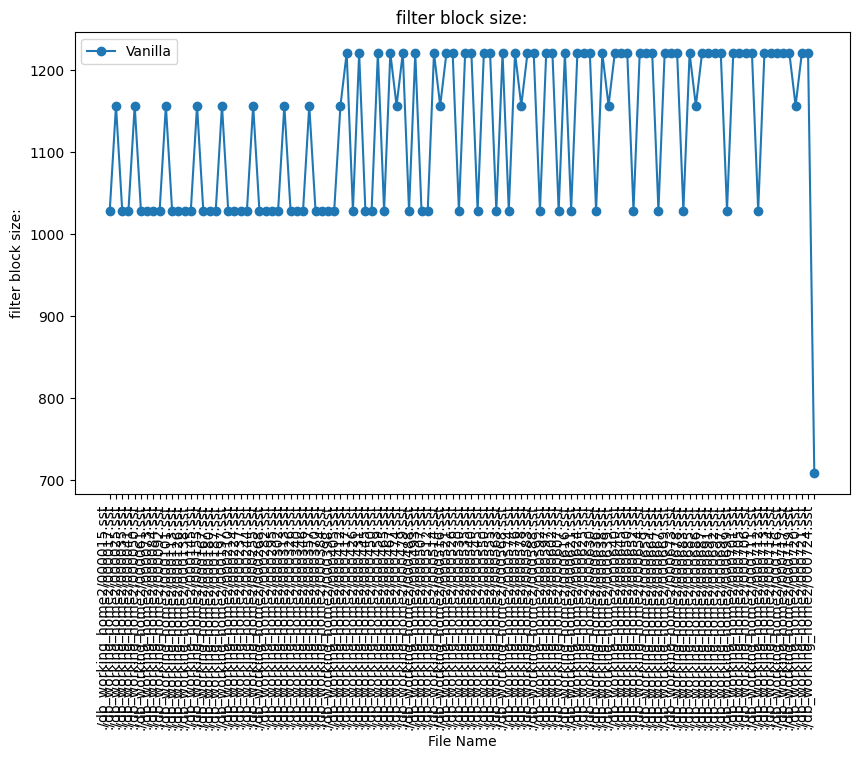

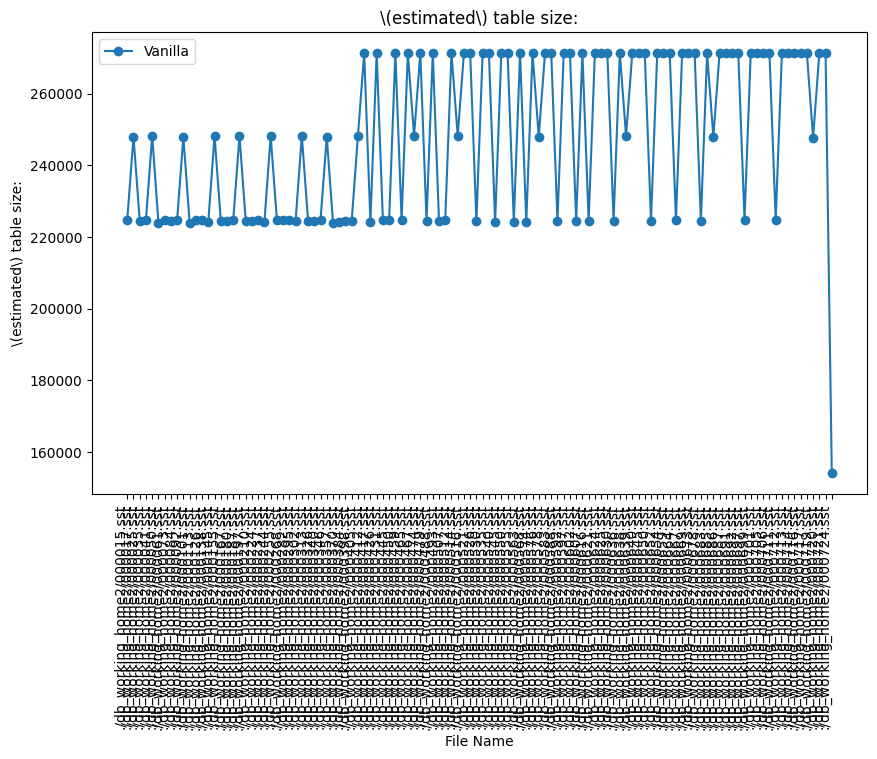

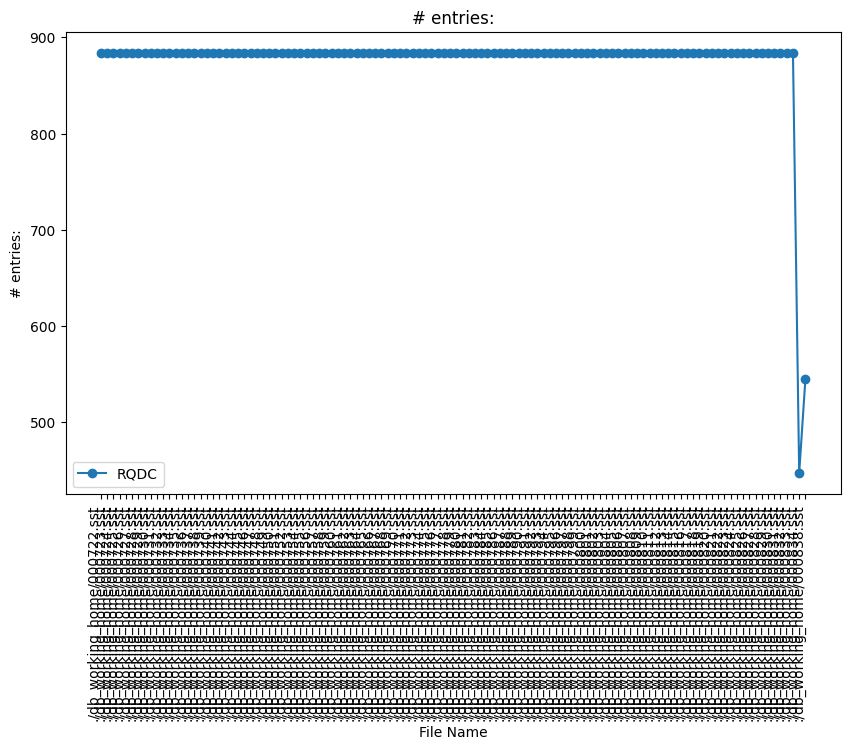

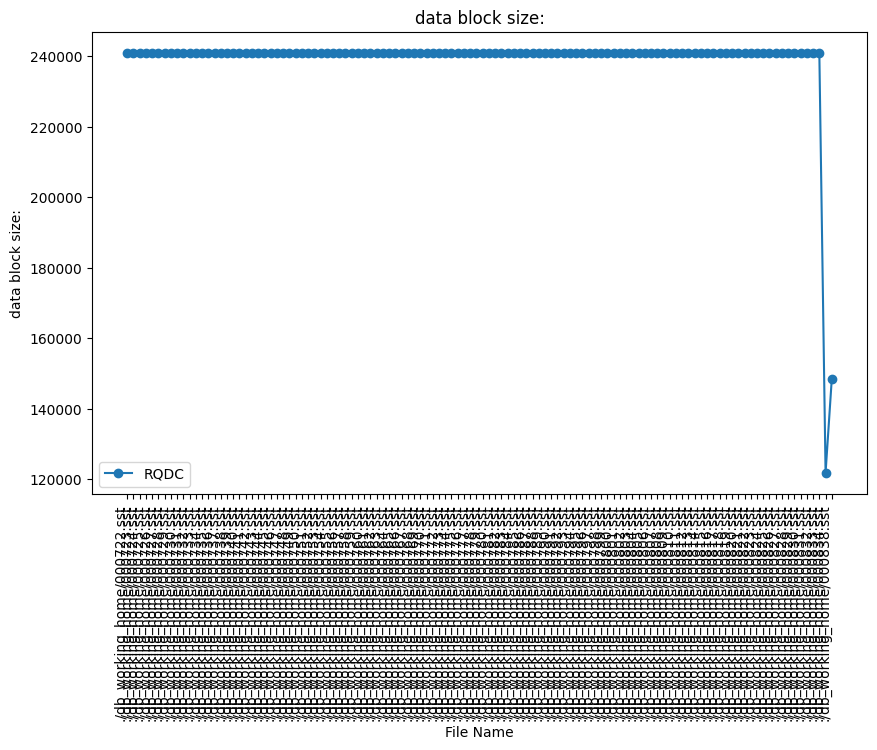

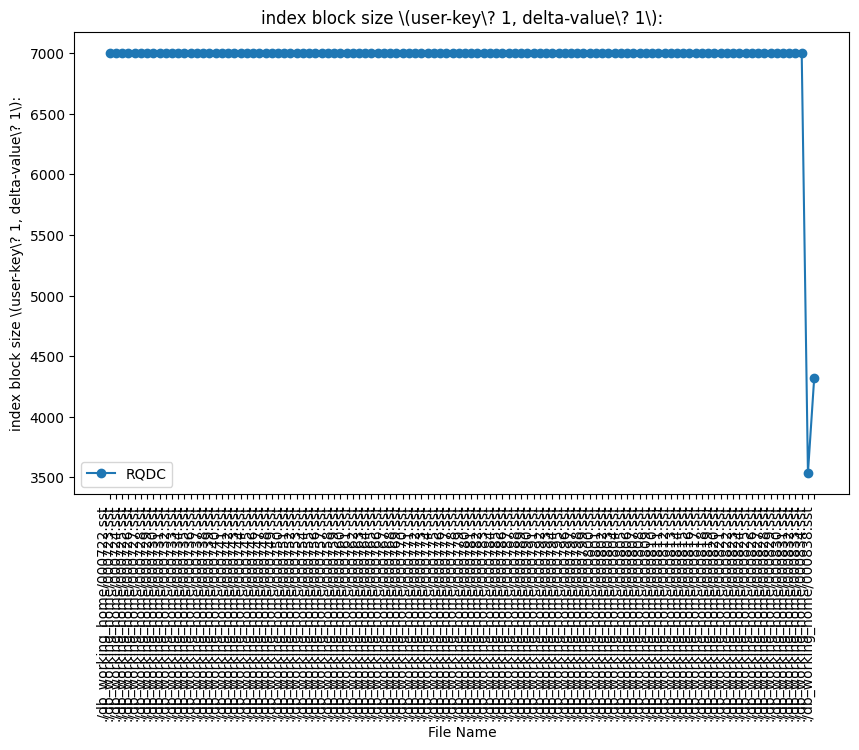

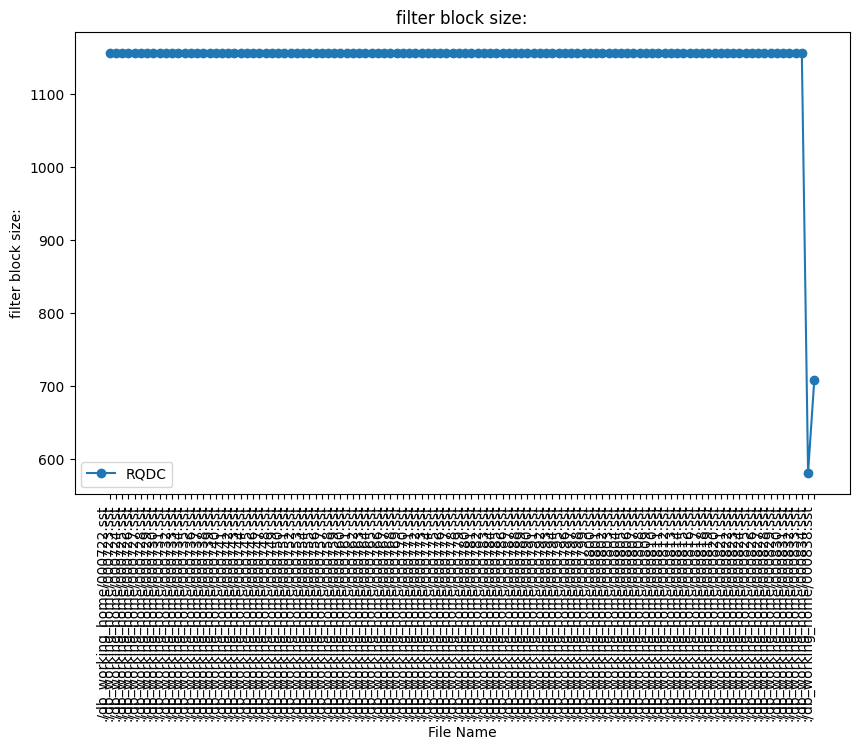

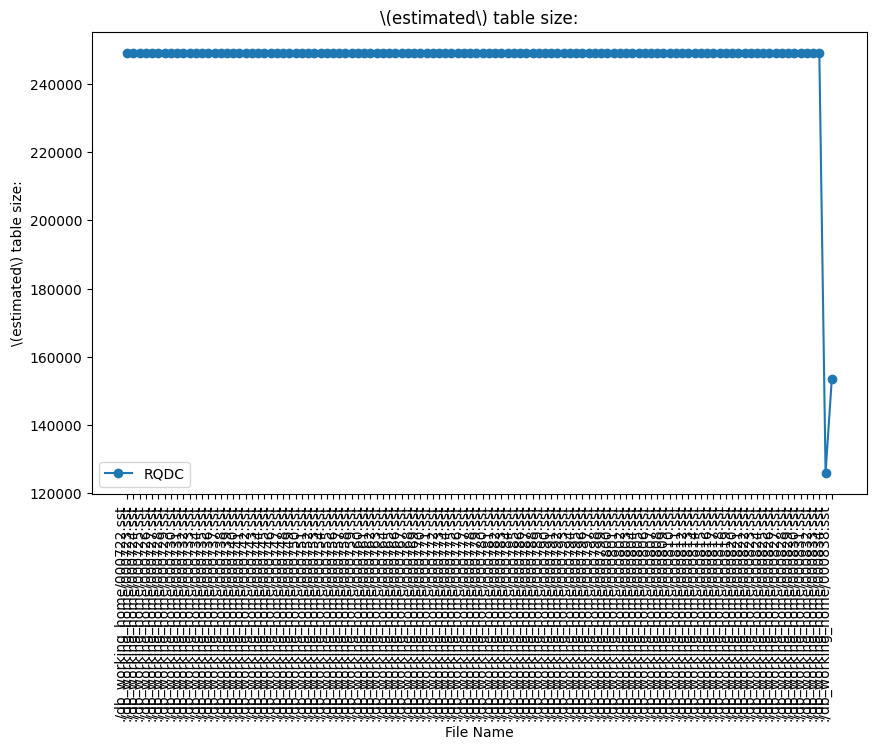

In [17]:
import re
import csv
import pandas as pd
import matplotlib.pyplot as plt

# Define the input files and output CSV file paths
vanilla_input_path = 'van_prop.txt'
rqdc_input_path = 'rq_prop.txt'

data_point_patterns = [
    "# data blocks:",
    "# entries:",
    "data block size:",
    "index block size \(user-key\? 1, delta-value\? 1\):",
    "filter block size:",
    "\(estimated\) table size:"
]

# Function to extract data points from the input file and create a DataFrame
def extract_and_create_dataframe(input_path):
    with open(input_path, 'r') as input_file:
        content = input_file.read()

    data_point_patterns = [
        "# data blocks:",
        "# entries:",
        "data block size:",
        "index block size \(user-key\? 1, delta-value\? 1\):",
        "filter block size:",
        "\(estimated\) table size:"
    ]

    file_blocks = re.split(r'(?=Process ./db_working_home+)', content)[1:]
    all_data_points = []

    for block in file_blocks:
        lines = block.strip().split('\n')
        file_name = lines[0].split()[-1]

        data_points = {'File Name': file_name}
        for pattern in data_point_patterns:
            match = re.search(f"{pattern} (.+)", block)
            if match:
                data_points[pattern] = int(match.group(1))  # Convert to int for numerical values
            else:
                data_points[pattern] = None

        all_data_points.append(data_points)

    return pd.DataFrame(all_data_points)

# Create DataFrames for vanilla and rqdc approaches
vanilla_df = extract_and_create_dataframe(vanilla_input_path)
rqdc_df = extract_and_create_dataframe(rqdc_input_path)

# Plot graphs for each data point
data_point_names = data_point_patterns[1:]  # Exclude "File Name"
for data_point in data_point_names:
    plt.figure(figsize=(10, 6))
    plt.plot(vanilla_df['File Name'], vanilla_df[data_point], label='Vanilla', marker='o')
    # plt.plot(rqdc_df['File Name'], rqdc_df[data_point], label='RQDC', marker='o')
    plt.xlabel('File Name')
    plt.ylabel(data_point)
    plt.title(f'{data_point}')
    plt.legend()
    plt.xticks(rotation=90, ha='right')
    # plt.tight_layout()
    plt.show()

for data_point in data_point_names:
    plt.figure(figsize=(10, 6))
    # plt.plot(vanilla_df['File Name'], vanilla_df[data_point], label='Vanilla', marker='o')
    plt.plot(rqdc_df['File Name'], rqdc_df[data_point], label='RQDC', marker='o')
    plt.xlabel('File Name')
    plt.ylabel(data_point)
    plt.title(f'{data_point}')
    plt.legend()
    plt.xticks(rotation=90, ha='right')
    # plt.tight_layout()
    plt.show()


In [5]:
vanilla_df

,File Name,# data blocks:,# entries:,data block size:,index block size:,filter block size:,(estimated) table size:
0,./db_working_home2/000015.sst,400,799,217780,None,1029,None
1,./db_working_home2/000017.sst,440,879,239585,None,1157,None
2,./db_working_home2/000025.sst,399,798,217498,None,1029,None
3,./db_working_home2/000035.sst,399,798,217499,None,1029,None
4,./db_working_home2/000041.sst,441,881,240131,None,1157,None
...,...,...,...,...,...,...,...
223,./db_working_home2/000717.sst,482,963,262481,None,1221,None
224,./db_working_home2/000719.sst,440,880,239850,None,1157,None
225,./db_working_home2/000720.sst,482,963,262479,None,1221,None
226,./db_working_home2/000721.sst,482,963,262477,None,1221,None
